# Plot eye movements

# Setup

In [1]:
run -im djd.main -- --dbname=dj_hmov

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pprint
import scipy
import seaborn as sns
import warnings
# warnings.filterwarnings("ignore")

# DJD modules
from djd.hmov_unit import corr_predictors, predictor_corr_matrix
from djd.util import cm2inch
from djd.plot import adjust_spines, get_color_dict

In [6]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })

# Dynamically update plot-specific pars
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
#     'ytick.major.pad': 1, # 3.5
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    })

# Get default colors for opto, locomotion and eye data
col_dict = get_color_dict(color_names=['blue','orange', 'green', 'red', 'purple',
                                       'brown', 'pink', 'gray', 'yellow', 'lightblue'])
cols = {'opto': col_dict['blue'],
        'run': col_dict['green'],
        'eye': col_dict['orange'],
        }

# Get unit keys

In [7]:
df = pd.DataFrame((Series.Experiment() & HmovUnit()).fetch(dj.key, as_dict=True))
df

,m,s,e
0,Ntsr1Cre_2019_0007,6,9
1,Ntsr1Cre_2019_0008,3,7
2,Ntsr1Cre_2019_0008,5,8
3,Ntsr1Cre_2019_0008,6,6
4,Ntsr1Cre_2019_0008,7,6
5,Ntsr1Cre_2020_0001,2,7
6,Ntsr1Cre_2020_0001,3,6
7,Ntsr1Cre_2020_0001,3,10
8,Ntsr1Cre_2020_0002,3,6
9,Ntsr1Cre_2020_0002,4,8


# Get eye movements to Hmov

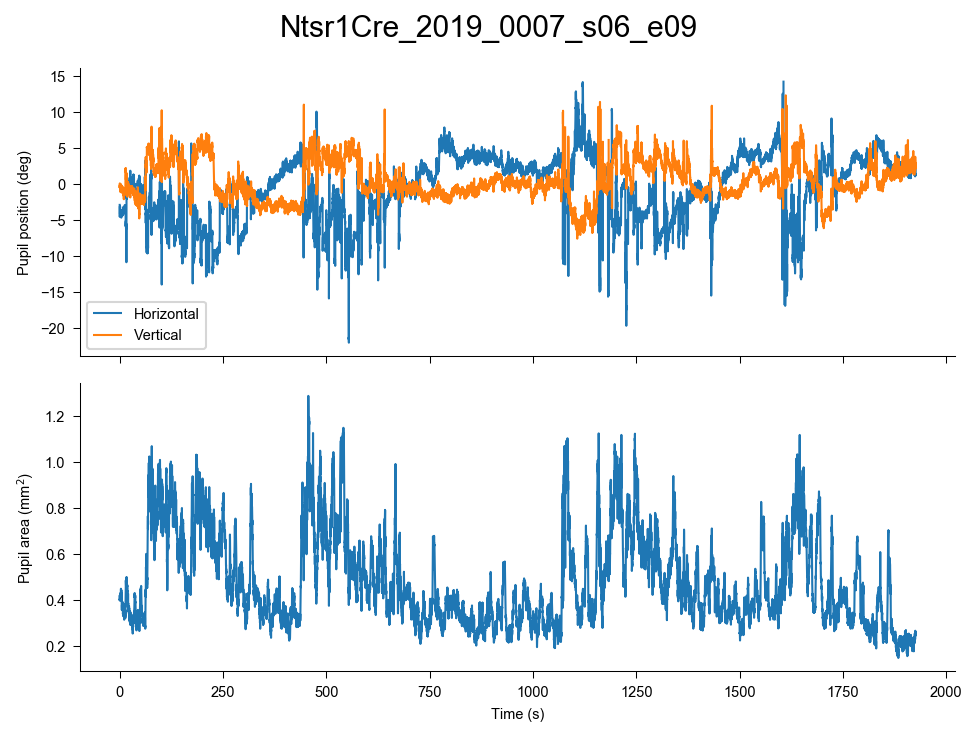

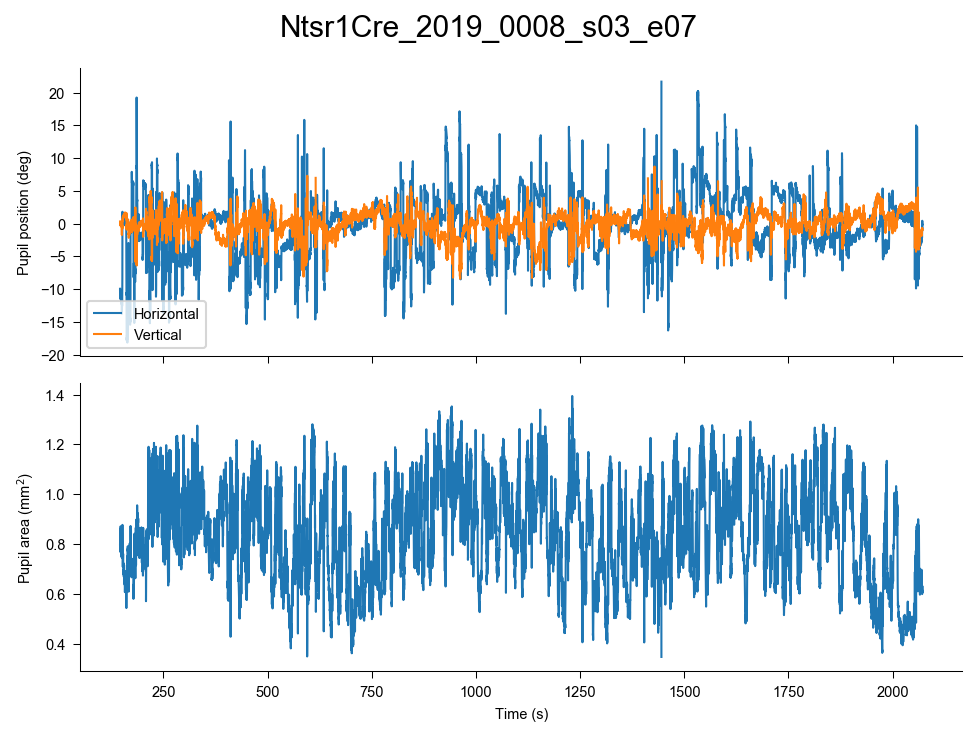

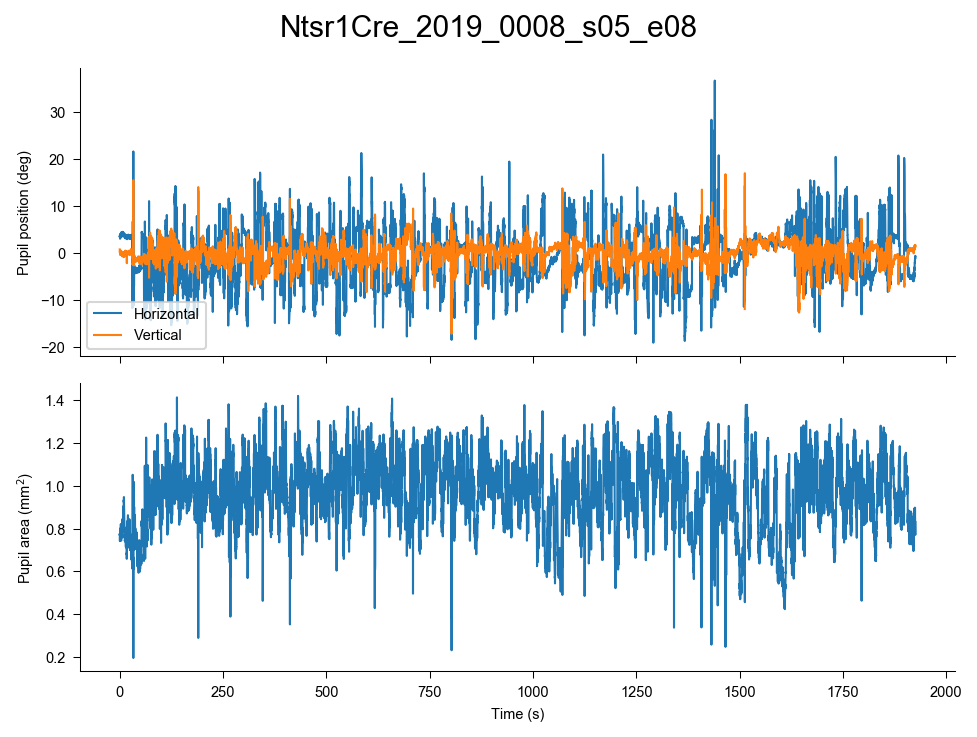

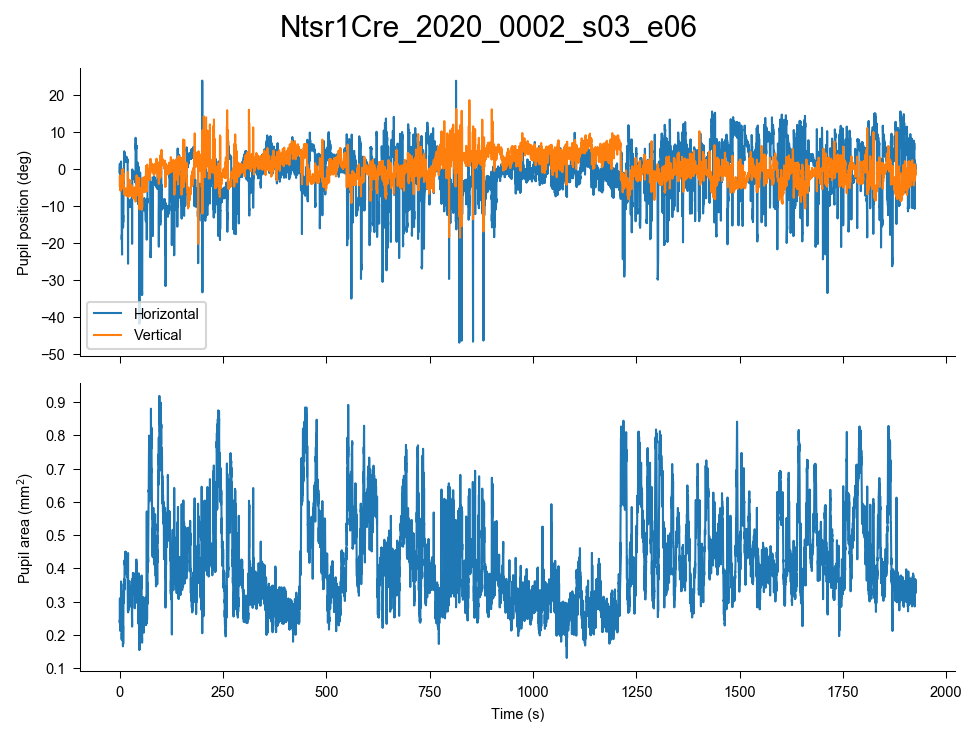

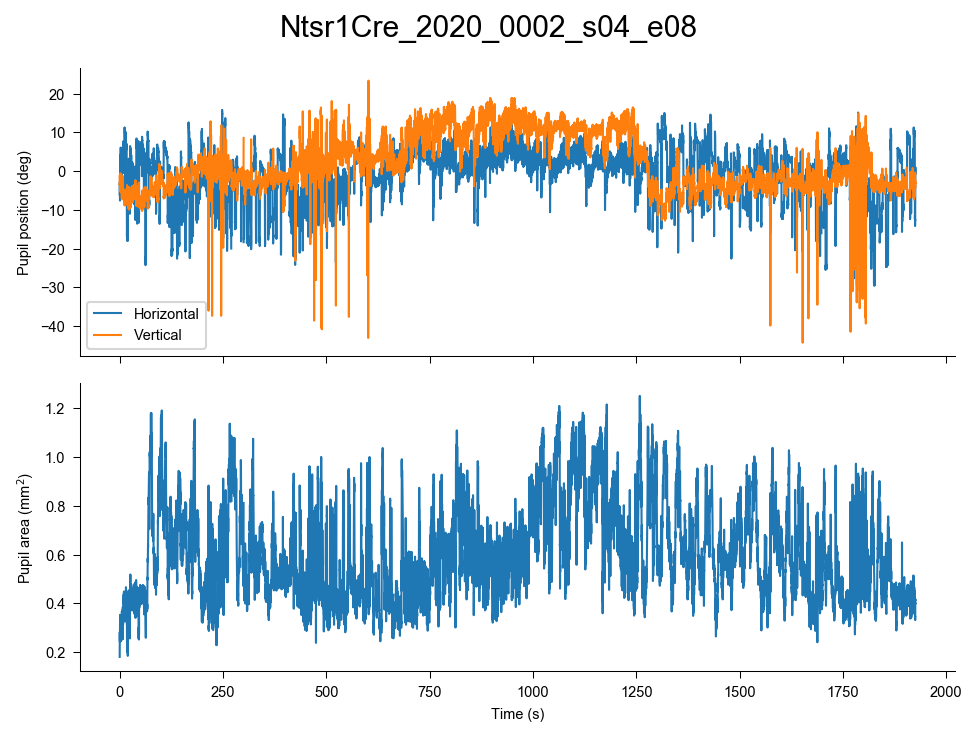

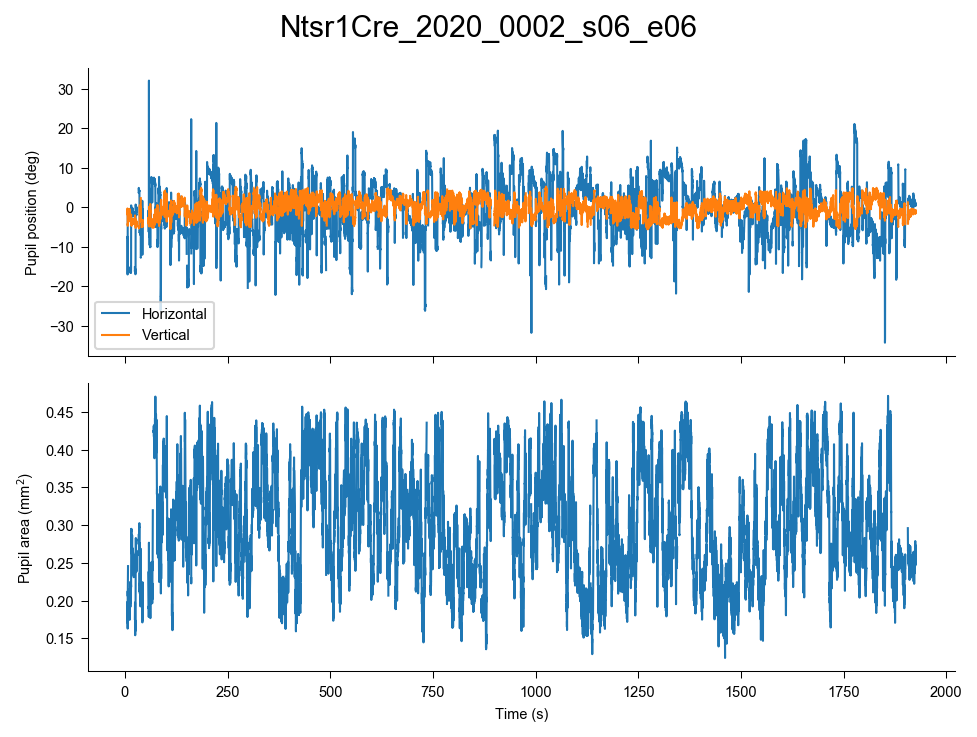


Error list:
[{'e': 6, 'm': 'Ntsr1Cre_2019_0008', 's': 6},
 {'e': 6, 'm': 'Ntsr1Cre_2019_0008', 's': 7},
 {'e': 7, 'm': 'Ntsr1Cre_2020_0001', 's': 2},
 {'e': 6, 'm': 'Ntsr1Cre_2020_0001', 's': 3},
 {'e': 10, 'm': 'Ntsr1Cre_2020_0001', 's': 3}]
Experiments in the error list have no eye data populated.


In [8]:
# Plot eye data
err_list = []

for i, key in df.head(n=len(df)).iterrows():
    key = key.to_dict()
    try:
        
        (Eye() & key).exp_plot(axs=None, smooth=True, state=None, title=None,
                               plot_pos=True, pos_colors=('C0', 'C1'),
                               plot_area=True, area_color='C0')
        plt.show()
    except:
        err_list.append(key)
        continue
print('\nError list:')
pprint.pprint(err_list)
print('Experiments in the error list have no eye data populated.')

# Get eye movements to sparse noise

In [19]:
# Sparse noise experiments in dj_hmov are restricted to mice that have the Hmov recorded
# df = pd.DataFrame((Series.Experiment() & 'e_name LIKE "%sparse%"' & (Mouse() & HmovUnit())).fetch(dj.key, as_dict=True))
df = pd.DataFrame((Series.Experiment() & 'e_name LIKE "%sparse%"').fetch(dj.key, as_dict=True))

df

,m,s,e
0,Ntsr1Cre_2019_0002,1,1
1,Ntsr1Cre_2019_0002,2,1
2,Ntsr1Cre_2019_0002,3,1
3,Ntsr1Cre_2019_0002,4,1
4,Ntsr1Cre_2019_0002,4,3
...,...,...,...
46,Ntsr1Cre_2020_0003,5,2
47,Ntsr1Cre_2020_0004,2,10
48,Ntsr1Cre_2020_0004,3,7
49,Ntsr1Cre_2020_0004,4,11


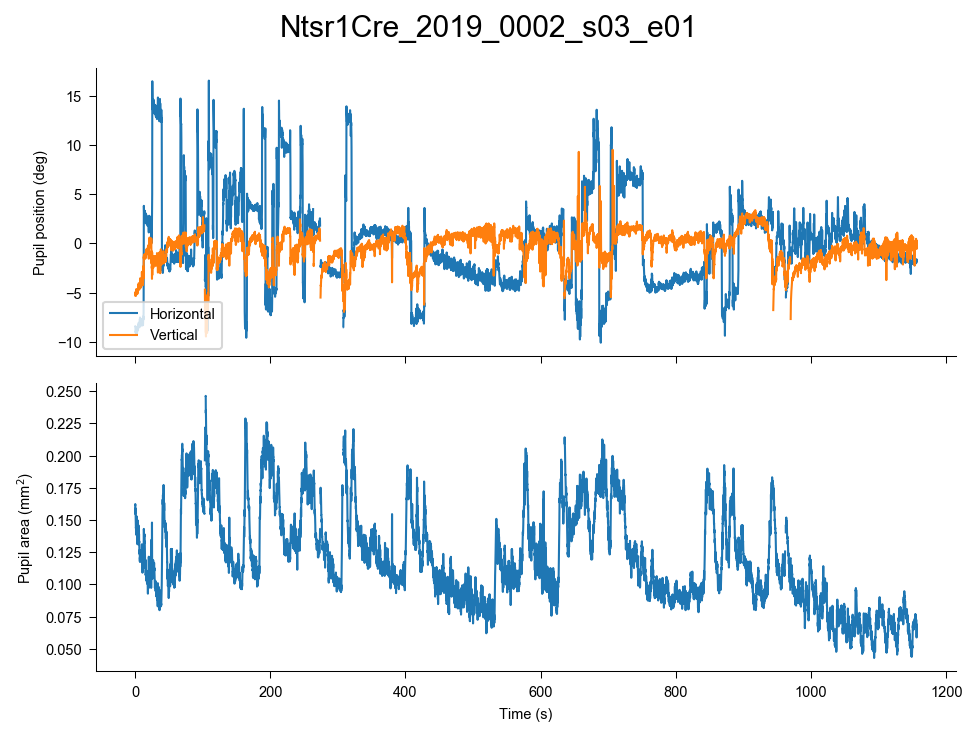

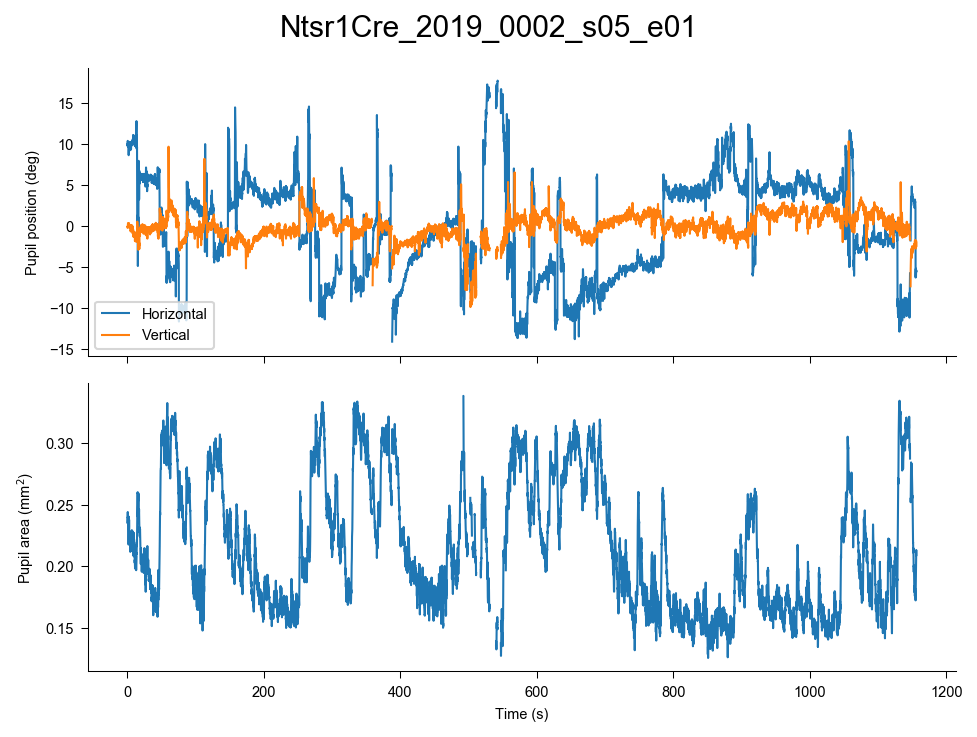

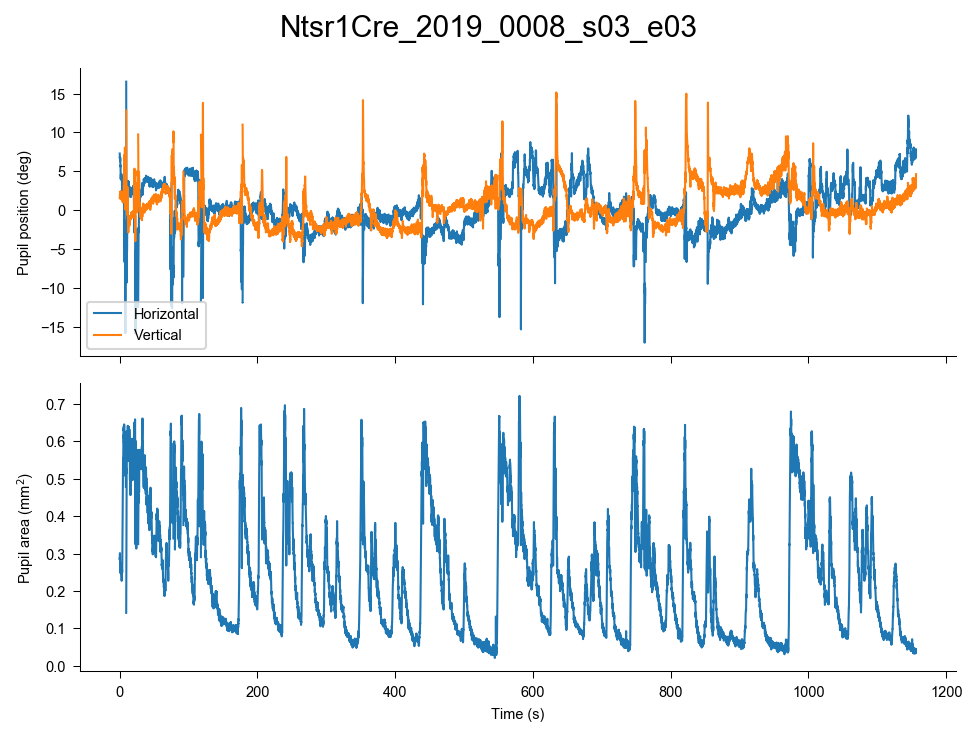


Error list:
[{'e': 1, 'm': 'Ntsr1Cre_2019_0002', 's': 1},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0002', 's': 2},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0002', 's': 4},
 {'e': 3, 'm': 'Ntsr1Cre_2019_0002', 's': 4},
 {'e': 2, 'm': 'Ntsr1Cre_2019_0003', 's': 1},
 {'e': 2, 'm': 'Ntsr1Cre_2019_0003', 's': 2},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0003', 's': 3},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0003', 's': 4},
 {'e': 4, 'm': 'Ntsr1Cre_2019_0007', 's': 1},
 {'e': 7, 'm': 'Ntsr1Cre_2019_0007', 's': 1},
 {'e': 2, 'm': 'Ntsr1Cre_2019_0007', 's': 2},
 {'e': 6, 'm': 'Ntsr1Cre_2019_0007', 's': 2},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0007', 's': 3},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0007', 's': 4},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0007', 's': 5},
 {'e': 1, 'm': 'Ntsr1Cre_2019_0007', 's': 6},
 {'e': 8, 'm': 'Ntsr1Cre_2019_0008', 's': 1},
 {'e': 4, 'm': 'Ntsr1Cre_2019_0008', 's': 2},
 {'e': 3, 'm': 'Ntsr1Cre_2019_0008', 's': 4},
 {'e': 3, 'm': 'Ntsr1Cre_2019_0008', 's': 5},
 {'e': 3, 'm': 'Ntsr1Cre_2019_0008', 's': 6},
 {'e': 3, 'm': 'Ntsr1

In [20]:
# Plot eye data
err_list = []

for i, key in df.head(n=len(df)).iterrows():
    key = key.to_dict()
    try:
        
        (Eye() & key).exp_plot(axs=None, smooth=True, state=None, title=None,
                               plot_pos=True, pos_colors=('C0', 'C1'),
                               plot_area=True, area_color='C0')
        plt.show()
    except:
        err_list.append(key)
        continue
print('\nError list:')
pprint.pprint(err_list)
print('Experiments in the error list have no eye data populated.')